In [128]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import itertools

In [129]:
def michalewicz(x, m=10):
    return -sum([math.sin(x[i]) * math.sin((i+1)*x[i]**2/math.pi)**(2*m) for i in range(len(x))])


In [130]:
def graficar_arreglo(arr, mejor_valor):
    # Crear una lista de índices para usar en el eje x
    x = range(len(arr))

    # Crear una nueva figura con tamaño de 10x4 pulgadas
    plt.figure(figsize=(4, 3))

    # Generar el gráfico de líneas para el arreglo arr
    plt.plot(x, arr)

    # Generar el gráfico de líneas para el arreglo mejor_valor en rojo
    plt.plot(x, mejor_valor, color='red')

    # Agregar etiquetas a los ejes
    plt.xlabel('Índice')
    plt.ylabel('Valor')

    # Agregar un título al gráfico
    plt.title('Función de coste y mejor valor')

    # Mostrar el gráfico
    plt.show()

In [131]:
def graficarTemp(arr, titulo):


    # Crear una nueva figura con tamaño de 10x4 pulgadas
    plt.figure(figsize=(4, 3))

    x = range(len(arr))

    # Generar el gráfico de líneas para el arreglo arr
    plt.plot(x, arr)

    # Generar el gráfico de líneas para el arreglo mejor_valor en rojo
    plt.plot(x, arr)

    # Agregar etiquetas a los ejes
    plt.xlabel('Índice')
    plt.ylabel('Valor')

    # Agregar un título al gráfico
    plt.title('Temperatura con funcion '+titulo)

    # Mostrar el gráfico
    plt.show()


In [132]:
def enfriamiento(Tk, k, mode):

  if mode == 0:
    return Tk-0.5
  elif mode == 1:
    return Tk*0.95
  elif mode == 2:
    return (Tk/math.log(k+1))
  elif mode == 3:
    if k <850:
      if k==0: k=0.0000001
      return k/(k+1) * Tk
    else:
      return Tk*0.99
  elif mode == 4:
    return Tk/(1+2*Tk)

In [143]:
def recocidoSimulado(T0, num_vars, modeTemp, iter):
  T = T0


  solucionA = [random.uniform(0, math.pi)] * num_vars

  coste = []
  mejorCoste = []
  temp = []

  k = 1

  mejorSolucion = solucionA


  for i in range(500):
    for j in range(2*iter):#Como vamos a ejecutar 10,000 100,000 o 500,000 iteraciones, ya solo tendremos que asignarle a iter 10, 100 o 500 dependiendo la dimensión del problema
      #Generamos el vecindario que se especifica
      solucionB = [solucionA[i] + random.uniform(-1, 1) for i in range(num_vars)]

      delta = michalewicz(solucionB) - michalewicz(solucionA)

      if delta < 0:
        solucionA = solucionB
      else:
        if T == 0: T = 0.00001
        P = math.exp(-delta/T)
        #random.seed(semilla)
        r = random.randint(0,100)/100
      #  print(r)
        if r<P:
          solucionA = solucionB

      coste.append(michalewicz(solucionA))

      if michalewicz(solucionA)<michalewicz(mejorSolucion):
        mejorSolucion = solucionA
      
      mejorCoste.append(michalewicz(mejorSolucion))
      temp.append(T)

      k+=1
      
      #if k%setTemp == 0:
       # T = T0
    T = enfriamiento(T,k,modeTemp)

  return coste, mejorCoste, mejorSolucion, temp

La solucion es: [51.76235853178631, 95.51003006742934] y su costo es: -1.7635950158549902


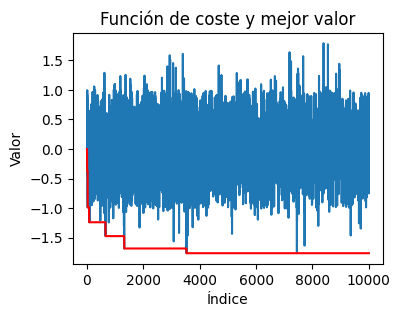

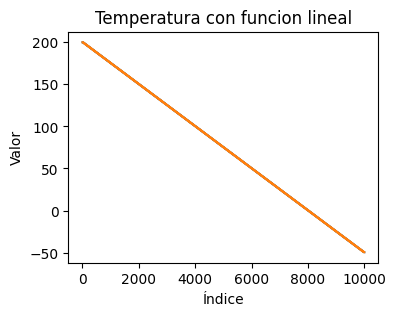

In [155]:
coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(200, 2, 0, 10)
print(f'La solucion es: {mejorSolucion} y su costo es: {michalewicz(mejorSolucion)}')
graficar_arreglo(coste, mejorCoste)
graficarTemp(temp, 'lineal')

La solucion es: [13.87929198018232, 26.611222607390843] y su costo es: -1.9316068230292824


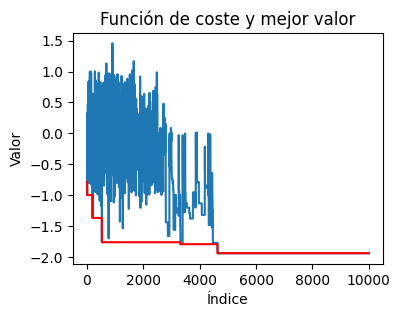

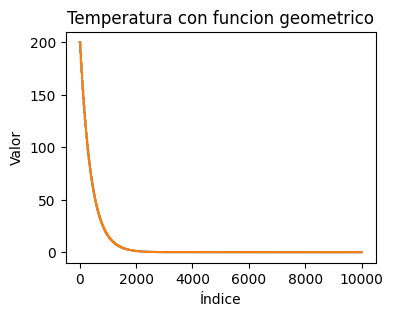

In [135]:
coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(200, 2, 1, 10)
print(f'La solucion es: {mejorSolucion} y su costo es: {michalewicz(mejorSolucion)}')
graficar_arreglo(coste, mejorCoste)
graficarTemp(temp, 'geometrico')

La solucion es: [-4.961004141685635, 14.139126754756282] y su costo es: -1.9530580546303802


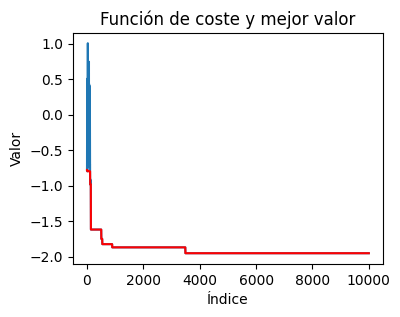

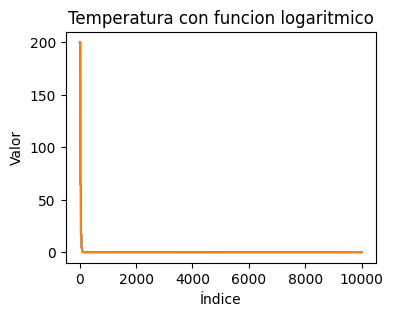

In [136]:
coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(200, 2, 2, 10)
print(f'La solucion es: {mejorSolucion} y su costo es: {michalewicz(mejorSolucion)}')
graficar_arreglo(coste, mejorCoste)
graficarTemp(temp, 'logaritmico')

La solucion es: [-4.95012423030349, -4.15950930800766] y su costo es: -1.7916998173168968


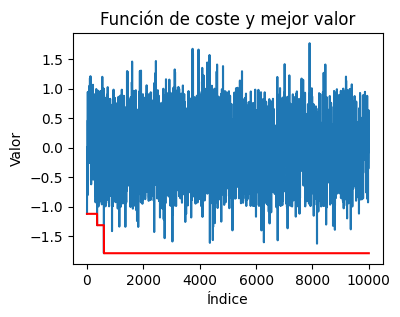

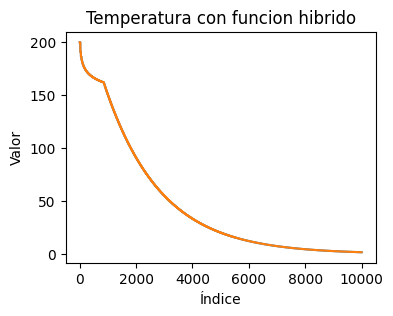

In [137]:
coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(200, 2, 3, 10)
print(f'La solucion es: {mejorSolucion} y su costo es: {michalewicz(mejorSolucion)}')
graficar_arreglo(coste, mejorCoste)
graficarTemp(temp, 'hibrido')

La solucion es: [-4.964085417336532, 1.567538463689704] y su costo es: -1.9670664325765927


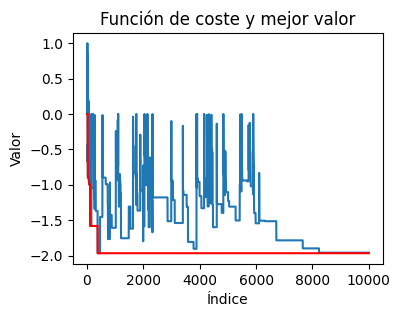

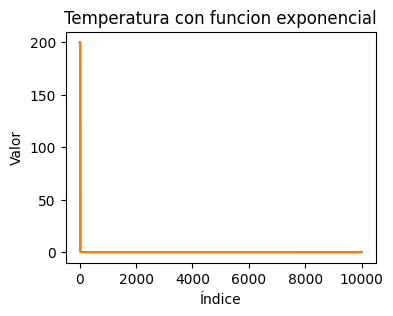

In [138]:
coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(200, 2, 4, 10)
print(f'La solucion es: {mejorSolucion} y su costo es: {michalewicz(mejorSolucion)}')
graficar_arreglo(coste, mejorCoste)
graficarTemp(temp, 'exponencial')

In [188]:
def prueba(iter,numVar):

  soluciones = []
  costoSoluciones = []


  for i in [2,3,5,7,11,13,17,19,23,29]:
      coste, mejorCoste, mejorSolucion, temp = recocidoSimulado(300, numVar,4, iter)
      
      soluciones.append(mejorSolucion)
      costoSoluciones.append(michalewicz(mejorSolucion))
      #print(f'La solucion es: {mejorSolucion} y su costo es: {costo_qap(flujo,distancia,mejorSolucion)}')

  mejorCoste = min(costoSoluciones)
  peorCoste = max(costoSoluciones)

  indexMejorValor = costoSoluciones.index(mejorCoste)
  indexPeorValor = costoSoluciones.index(peorCoste)

  media = np.mean(costoSoluciones)
  dEstandar = np.std(costoSoluciones)

  print(f'La mejor solucion es {soluciones[indexMejorValor]} con un costo de: {costoSoluciones[indexMejorValor]}')
  print(f'La peor solucion es {soluciones[indexPeorValor]} con un costo de: {costoSoluciones[indexPeorValor]}')
  print(f'La media del costo de estas soluciones es de {media}')
  print(f'La desviacion estandar de estas soluciones es {dEstandar}')

In [189]:
print("2 dimensiones")
prueba(2,2)


2 dimensiones
La mejor solucion es [8.003599989337078, -4.709394239337032] con un costo de: -1.9766344874624873
La peor solucion es [-4.982470648478853, -4.678152391501868] con un costo de: -1.5971656318206333
La media del costo de estas soluciones es de -1.8053263349324797
La desviacion estandar de estas soluciones es 0.12222028152697684


In [190]:
prueba(5,5)

La mejor solucion es [2.2112615805743525, 14.813078124430394, 2.2404189184507777, 1.0583563894464203, 1.7414154521017438] con un costo de: -3.7985674938020257
La peor solucion es [-0.643912276648247, 1.5079482506790831, 2.1573197538291105, 1.921769118165154, 0.9416661912876625] con un costo de: -2.8238006915965186
La media del costo de estas soluciones es de -3.111072590609333
La desviacion estandar de estas soluciones es 0.27644718169291904


In [191]:
print("10 dimensiones")
prueba(10,10)

10 dimensiones
La mejor solucion es [1.5930804363633948, 1.1668108198536484, 13.633346840122414, 13.68730678675855, -4.750079079945289, 7.195883447877135, 1.9144965060437356, -4.904746676181189, -3.8504818177599565, -5.112285142442662] con un costo de: -5.100778744465307
La peor solucion es [0.5872425822855158, -0.6815893661270473, 6.8991770594978785, -5.060069734692432, 8.252542077439635, -12.33926742275062, 0.8690720924330464, 7.24449804679631, -2.3036894144400586, -5.30199171233378] con un costo de: -3.976804059398713
La media del costo de estas soluciones es de -4.470341174934764
La desviacion estandar de estas soluciones es 0.3181870872812983
